# ANOVA

In [51]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistical functions.
import scipy.stats as stats

# Mathematical functions.
import math

# Data frames.
import pandas as pd

## More Samples

In [52]:
# First sample.
sample_a = np.random.normal(loc=10.0, scale=1.0, size=50)

# Second sample.
sample_b = np.random.normal(loc=10.0, scale=1.0, size=50)

# Third sample.
sample_c = np.random.normal(loc=10.0, scale=1.0, size=50)

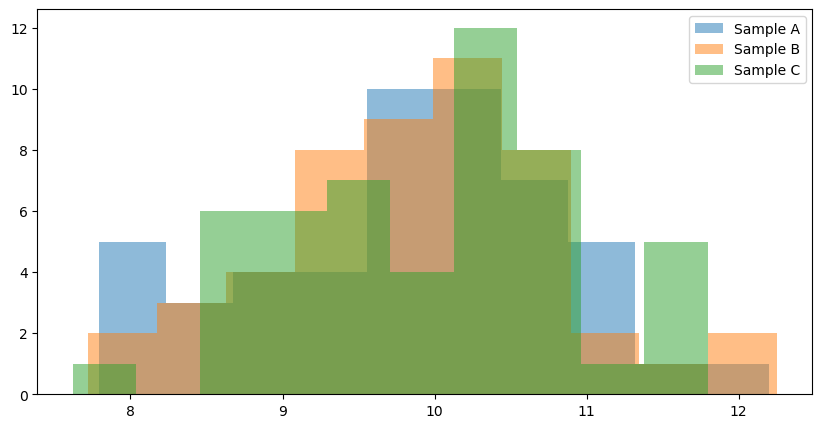

In [53]:
# Create histograms.
fig, ax = plt.subplots(figsize=(10, 5))

# Histogram of the first sample.
ax.hist(sample_a, bins=10, alpha=0.5, label='Sample A')

# Histogram of the second sample.
ax.hist(sample_b, bins=10, alpha=0.5, label='Sample B')

# Histogram of the third sample.
ax.hist(sample_c, bins=10, alpha=0.5, label='Sample C')

# Add a legend.
ax.legend();

In [54]:
# Independent samples t-test on sample_a and sample_b.
t_statistic, p_value = stats.ttest_ind(sample_a, sample_b)

# Show.
t_statistic, p_value

(-0.2704423186285203, 0.7873887224564158)

The chance of seeing the t-test value as extreme as -0.36 is 71%, so cannot reject null. Theres no reason to suspect that the means are different

In [55]:
# Independent samples t-test on sample_b and sample_a.
t_statistic, p_value = stats.ttest_ind(sample_b, sample_a)

# Show.
t_statistic, p_value

(0.2704423186285203, 0.7873887224564158)

notice the ttest value is now +ve (reflected), but p-value is the same

In [56]:
# Independent samples t-test on sample_a and sample_c.
t_statistic, p_value = stats.ttest_ind(sample_a, sample_c)

# Show.
t_statistic, p_value

(-1.0573338783024206, 0.2929586352288357)

cannot reject

In [57]:
# Independent samples t-test on sample_b and sample_c.
t_statistic, p_value = stats.ttest_ind(sample_b, sample_c)

# Show.
t_statistic, p_value

(-0.826182627569652, 0.4107073931120556)

cannot reject

## $n$ Samples

Question: If we havae 4 samples, how many different ttest can we perform?

In [58]:
# Number of samples.
n = 4

In [59]:
# Show the sample labels.
print(list(range(4)))

[0, 1, 2, 3]


For 4 samples, we can perform 6 t-tests:

[0, 1]  
[0, 2]  
[0, 3]  
[1, 2]  
[1, 3]  
[2, 3]  

In [60]:
# Number of ways of selecting two samples from n.
math.comb(n, 2)

6

In [61]:
# Suppose we had 6 samples.
n = 6
math.comb(n, 2)

15

In [62]:
# Suppose we had 7 samples.
n = 7
math.comb(n, 2)

21

## Type I Errors

In [ ]:
def simulate_ttest(alpha=0.05):
    # Generate a random sample a.
    sample_a = np.random.normal(loc=10.0, scale=1.0, size=50)
    # Generate similar sample b.
    sample_b = np.random.normal(loc=10.0, scale=1.0, size=50)
    
    # Perform the t-test.
    _, p_value = stats.ttest_ind(sample_a, sample_b) # _ just ignore that value
    
    # Decide whether to reject the null hypothesis.
    if p_value < alpha:
        return True
    else:
        return False
    
simulate_ttest()

False

do not reject the null hypo, no evidence, the data are not extreme, the values from sample b are not different enough from sample A for u to reject the null hypo.

just remember that when using random, sometimes u DO get extreme values, and can reject null. how many times does that happen?

In [64]:
# Number of rejections.
no_rejections = 0

# Run several simulations.
for _ in range(10000):
    # Check if the null hypothesis is rejected.
    if simulate_ttest():
        # Increment the number of rejections.
        no_rejections += 1

# Show the number of rejections.
no_rejections

495

495/10000 = 0.05! 1/20 times
5% of the time, u end up rejecting the null when u shouldnt. 

When u have n=7, and u have to do t-tests on them, bc the value above is 21, u are expecting at least 1 false positive (reject null when u shouldnt assuming null is true). What if assuming alternative is true? 

type I (alpha, false positive) reject null when null is true

type II (beta, false negative) failure to reject null when null is false

1-beta is the power of test (the probability that the test correctly rejects the null hypothesis when the alternative hypothesis is true). 

https://en.wikipedia.org/wiki/Power_(statistics)

So question, why not make it lower? Say 0.01? The problem of that is, it will reduce the power of test (1-beta), which means it reduces the probability of rejecting the null hypothesis when the alternative is true. so it's better to increase the alpha.

## ANOVA

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html  
https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php  

In [65]:
# From Laerd.
beginner = np.random.normal(27.2, 3.04777, 10)
intermediate = np.random.normal(23.6, 3.30656, 10)
advanced = np.random.normal(23.4, 3.23866, 10)

In [66]:
# Create data frame.
df = pd.DataFrame({'Beginner': beginner, 'Intermediate': intermediate, 'Advanced': advanced})

# Show.
df

,Beginner,Intermediate,Advanced
0,26.223587,18.893325,21.221909
1,22.310693,22.420863,26.768587
2,29.297468,22.643182,24.954426
3,31.059489,20.353267,21.679597
4,23.317380,27.877577,21.321725
5,21.055550,16.439013,24.161992
6,30.644121,25.546052,30.007563
7,32.212770,26.482672,20.677342
8,23.815783,27.764428,18.092130
9,24.343773,25.881142,20.817680


In [67]:
# Describe.
df.describe()

,Beginner,Intermediate,Advanced
count,10.000000,10.000000,10.000000
mean,26.428061,23.430152,22.970295
std,4.050029,3.928978,3.502943
min,21.055550,16.439013,18.092130
25%,23.441981,20.870166,20.918737
50%,25.283680,24.094617,21.500661
75%,30.307457,26.332289,24.756318
max,32.212770,27.877577,30.007563


In [68]:
# Perform ANOVA.
f_statistic, p_value = stats.f_oneway(df['Beginner'], df['Intermediate'], df['Advanced'])

# Show.
f_statistic, p_value

(2.397978842759642, 0.10999932659503418)

In [69]:
# Tukey's HSD.
res = stats.tukey_hsd(df['Beginner'], df['Intermediate'], df['Advanced'])

# Show.
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      2.998     0.206    -1.254     7.250
 (0 - 2)      3.458     0.128    -0.794     7.710
 (1 - 0)     -2.998     0.206    -7.250     1.254
 (1 - 2)      0.460     0.961    -3.792     4.712
 (2 - 0)     -3.458     0.128    -7.710     0.794
 (2 - 1)     -0.460     0.961    -4.712     3.792



## Presenting the Data

In [70]:
# From Laerd.
beginner = np.random.normal(27.2, 3.04777, 10)
intermediate = np.random.normal(23.6, 3.30656, 10)
advanced = np.random.normal(23.4, 3.23866, 10)

# Concatenate arrays.
data = np.concatenate([beginner, intermediate, advanced])

# Show.
data

array([26.08558063, 26.00989715, 30.20542759, 20.81178545, 34.25776925,
       29.73499906, 29.3289402 , 28.77113695, 27.73716855, 28.03951062,
       20.61930206, 20.06359536, 27.77766683, 21.95992635, 30.2402765 ,
       23.37158295, 27.86573875, 27.07465987, 18.69387601, 24.44409869,
       25.60629344, 24.25602154, 21.46307921, 25.28371648, 30.50208708,
       23.71268357, 25.95050955, 19.27657306, 19.88474451, 24.76302889])

In [71]:
# Create the labels.
labels = ['Beginner'] * 10 + ['Intermediate'] * 10 + ['Advanced'] * 10

# Show.
labels

['Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Beginner',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Intermediate',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced',
 'Advanced']

In [72]:
# Create data frame.
df = pd.DataFrame({'Course': labels, 'Time': data})

# Show.
df

,Course,Time
0,Beginner,26.085581
1,Beginner,26.009897
2,Beginner,30.205428
3,Beginner,20.811785
4,Beginner,34.257769
5,Beginner,29.734999
6,Beginner,29.328940
7,Beginner,28.771137
8,Beginner,27.737169
9,Beginner,28.039511


In [73]:
# Pull the groups out.
b_times = df[df['Course'] == 'Beginner']['Time']
i_times = df[df['Course'] == 'Intermediate']['Time']
a_times = df[df['Course'] == 'Advanced']['Time']

# Perform ANOVA.
f, p = stats.f_oneway(b_times, i_times, a_times)

# Show.
f, p

(4.121942010586644, 0.027401857910227492)

In [74]:
# Tukey's HSD.
res = stats.tukey_hsd(b_times, i_times, a_times)

# Show.
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      3.887     0.054    -0.061     7.835
 (0 - 2)      4.028     0.045     0.080     7.977
 (1 - 0)     -3.887     0.054    -7.835     0.061
 (1 - 2)      0.141     0.996    -3.807     4.089
 (2 - 0)     -4.028     0.045    -7.977    -0.080
 (2 - 1)     -0.141     0.996    -4.089     3.807



## End